In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

path='drive/My Drive/Colab Notebooks/cluster/lab7/data/Wholesale customers data.csv'

In [3]:
data = pd.read_csv(path)
print(data.head())
print(data.shape)
data = np.array(data)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
(440, 8)


In [4]:
from sklearn.cluster import KMeans
from time import time

n_clusters=9

t_start = time()
model = KMeans(n_clusters, init='k-means++')
t_end = time()
t = t_end - t_start
print('[kmeans] %d分钟%.3f秒' % (int(t / 60), t - 60 * int(t / 60)))
pred = model.fit_predict(data)
# print(pred)
# print(model.cluster_centers_)
# print(pred==model.labels_)

[kmeans] 0分钟0.000秒


In [9]:
from sklearn.metrics import silhouette_score # 轮廓系数
from sklearn.metrics import calinski_harabaz_score
import warnings

warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

label_pred = model.labels_ # 获取聚类标签
centroids = model.cluster_centers_ # 获取聚类中心
inertia = model.inertia_ # 获取聚类准则的总和
silhouette_s = silhouette_score(data, model.labels_, metric='euclidean')
calinski_harabaz_s = calinski_harabaz_score(data, model.labels_)

# print(label_pred)
# print(centroids)
print('聚类准则总和:', inertia)
print('轮廓系数：', silhouette_s)
print('calinski_harabaz_score：', calinski_harabaz_s)

聚类准则总和: 20490347515.319965
轮廓系数： 0.26364434522713204
calinski_harabaz_score： 189.13860522415578


In [10]:
i = []
y_silhouette_score = []
inertia_score = []
calinskiharabaz_score = []

t_start = time()
for k in range(2,15+2):
    model = KMeans(n_clusters = k, random_state = 1, init='k-means++')
    pred = model.fit_predict(data)
    silhouette_s = silhouette_score(data, pred, metric='euclidean')
    print("silhouette_score for cluster {0}: {1}".format(k, silhouette_s))
    calinski_harabaz_s = calinski_harabaz_score(data, pred)
    print("calinski_harabaz_score for cluster {0}: {1}".format(k, calinski_harabaz_s))
    print("ineria_score for cluster {0}: {1}".format(k, model.inertia_))

    i.append(k)
    y_silhouette_score.append(silhouette_s)
    inertia_score.append(model.inertia_)
    calinskiharabaz_score.append(calinski_harabaz_s)
t_end = time()

t = t_end - t_start
print('[kmeans] %d分钟%.3f秒' % (int(t / 60), t - 60 * int(t / 60)))

silhouette_score for cluster 2: 0.5115333882980367
calinski_harabaz_score for cluster 2: 171.6846157967981
ineria_score for cluster 2: 113217528878.79836
silhouette_score for cluster 3: 0.4783511411368133
calinski_harabaz_score for cluster 3: 210.1525585163099
ineria_score for cluster 3: 80332414178.02908
silhouette_score for cluster 4: 0.3866313675434283
calinski_harabaz_score for cluster 4: 207.8196776373569
ineria_score for cluster 4: 64855545845.9014
silhouette_score for cluster 5: 0.37097889858665256
calinski_harabaz_score for cluster 5: 214.5033359671806
ineria_score for cluster 5: 53018940870.51153
silhouette_score for cluster 6: 0.3829695726302323
calinski_harabaz_score for cluster 6: 202.74242935459424
ineria_score for cluster 6: 47244614420.27199
silhouette_score for cluster 7: 0.313758341250634
calinski_harabaz_score for cluster 7: 201.10915332173656
ineria_score for cluster 7: 41617907206.47738
silhouette_score for cluster 8: 0.3307399012040161
calinski_harabaz_score for cl

Text(0.5, 1.0, 'k--calinski_harabaz_score')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


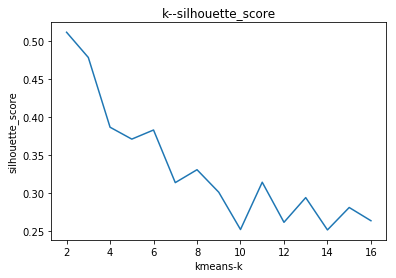

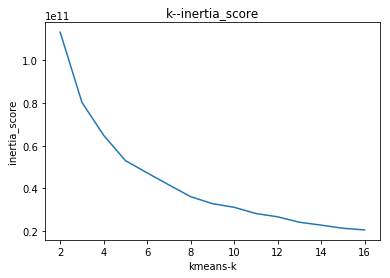

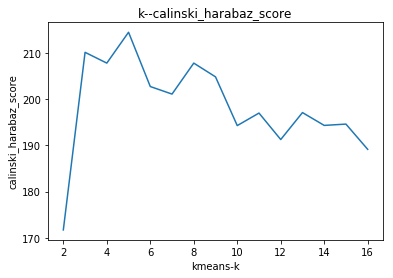

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure()  
plt.plot(i,y_silhouette_score)  
plt.xlabel("kmeans-k")  
plt.ylabel("silhouette_score")  
plt.title("k--silhouette_score")  

plt.figure()  
plt.plot(i,inertia_score)  
plt.xlabel("kmeans-k")  
plt.ylabel("inertia_score")  
plt.title("k--inertia_score")  

plt.figure()  
plt.plot(i,calinskiharabaz_score)  
plt.xlabel("kmeans-k")  
plt.ylabel("calinski_harabaz_score")  
plt.title("k--calinski_harabaz_score")  

